Hi Saya Suwarti.. Disini saya akan coba sedikit sharing tentang TensorFlow Klasifikasi Gambar..

Proyek Akhir Klasifikasi Gambar


*   Tujuan dari klasifikasi gambar ini adalah model Machine Learning dapat membedakan mana gambar yg masuk Batu (Rock), Kertas (Paper), Gunting ( Scissors)


In [ ]:
# import package-package yg diperlukan

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
# siapkan datanya

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-02 14:26:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.10MB/s    in 5m 4s   

2021-05-02 14:31:45 (1.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakkukan ekstraksi pada file zip

import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# melihat struktur data yang telah diunduh

os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
# membuat nama direktori

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat direktori baru di dalam direktori train dan validation

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# copy data train dan data validation ke direktori baru

import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
# melihat struktur data train dan data validation

len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [ ]:
# membuat sebuah objek image data generator untuk data training dan data testing

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
# gunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membangun arsitektur sebuah CNN

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
# memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# melatih model kita menggunakan metode fit

history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 43s - loss: 1.0168 - accuracy: 0.4625 - val_loss: 0.7228 - val_accuracy: 0.7563
Epoch 2/25
25/25 - 41s - loss: 0.6057 - accuracy: 0.7763 - val_loss: 0.3196 - val_accuracy: 0.8687
Epoch 3/25
25/25 - 41s - loss: 0.3454 - accuracy: 0.8763 - val_loss: 0.2350 - val_accuracy: 0.9125
Epoch 4/25
25/25 - 41s - loss: 0.2136 - accuracy: 0.9250 - val_loss: 0.1477 - val_accuracy: 0.9500
Epoch 5/25
25/25 - 41s - loss: 0.1881 - accuracy: 0.9312 - val_loss: 0.2207 - val_accuracy: 0.9187
Epoch 6/25
25/25 - 41s - loss: 0.2056 - accuracy: 0.9212 - val_loss: 0.1695 - val_accuracy: 0.9438
Epoch 7/25
25/25 - 41s - loss: 0.1512 - accuracy: 0.9400 - val_loss: 0.2459 - val_accuracy: 0.9438
Epoch 8/25
25/25 - 41s - loss: 0.1704 - accuracy: 0.9450 - val_loss: 0.2304 - val_accuracy: 0.9250
Epoch 9/25
25/25 - 41s - loss: 0.1302 - accuracy: 0.9475 - val_loss: 0.1345 - val_accuracy: 0.9812
Epoch 10/25
25/25 - 41s - loss: 0.1076 - accuracy: 0.9563 - val_loss: 0.1598 - val_accuracy: 0.9438
Epoch 11/

Saving Latih Prediksi Image.jpeg to Latih Prediksi Image.jpeg
Latih Prediksi Image.jpeg
paper


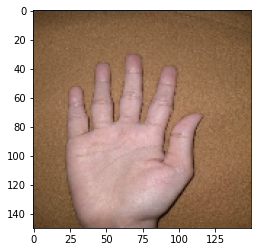

In [ ]:
# prediksi dari model

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')